In [1]:
###########################################
## Jax Demo
## Goal - fool around with Jax AutoDiff (function composition/transformation) library
##
## Author: Chris Meaney
## Date: Feb 2021
###########################################

In [2]:
## Import JAX dependencies
import jax 

import jax.numpy as jnp
from jax import grad, jit, vmap, hessian
from jax import random

## Plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import seaborn as sns

## Pandas data wrangling, summarization, etc.
import pandas as pd

## Old numpy - for comparing speed/flexibility JAX approach vs. existing NumPy/Scipy capabilities
import numpy as onp

In [3]:
## Set seed
key = random.PRNGKey(912834)

In [4]:
key

DeviceArray([     0, 912834], dtype=uint32)

In [5]:
############################################
##
##
## Stats distribution, density, mass, etc. functions
##
##
############################################

In [6]:
############################
## Bernoulli distirbution
############################
x = jax.random.bernoulli(key, p=0.30, shape=(10000,))
pd.Series(x).value_counts(normalize=True)

False    0.6995
True     0.3005
dtype: float64

In [7]:
## Simple loss function (scalar parm = p; vector input data = x)
def bern_loss(p, x):
    return -jnp.mean(jax.scipy.stats.bernoulli.logpmf(k=x, p=p))

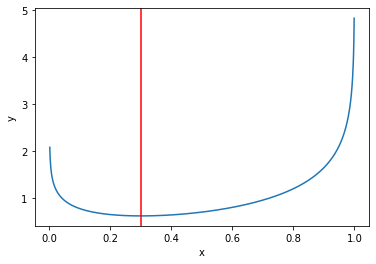

In [8]:
## Log Likelihood as a Function of Parameter (p)
support = jnp.linspace(0.001,0.999,1000)
log_lik = jnp.array([bern_loss(p=p,x=x) for p in support])

df = pd.DataFrame({'x':support, 'y':log_lik})
plt = sns.lineplot(data=df, x='x', y='y')
plt.axvline(0.30, color='red')

In [9]:
## Gradient of loss function
grad_p = grad(bern_loss, argnums=0)

In [10]:
## Get gradient for each value of support
grad_support = jnp.array([grad_p(p,x) for p in support])

In [11]:
## See what gradient is at minimizer (and what min value is)
df[['grad']] = grad_support

## Find minimizer
df = df.sort_values(by=['y'])
df.head(n=5)

,x,y,grad
300,0.300700,0.611287,0.000950
299,0.299701,0.611289,-0.003808
301,0.301699,0.611291,0.005690
298,0.298702,0.611295,-0.008584
302,0.302698,0.611299,0.010412


In [12]:
## Simple gradient descent update
p = 0.5
step_size = 0.01

l = []

for i in jnp.arange(250):
    current_loss = bern_loss(p, x)
    l.append(current_loss)
    print_string = "Iteration=" + str(i) + "\tLoss=" + str(current_loss) + "\tp=", str(p)
    print(print_string)
    p = p - step_size*grad_p(p, x)


('Iteration=0\tLoss=0.6931473\tp=', '0.5')
('Iteration=1\tLoss=0.686906\tp=', '0.49202')
('Iteration=2\tLoss=0.6811496\tp=', '0.48435727')
('Iteration=3\tLoss=0.67583644\tp=', '0.47699577')
('Iteration=4\tLoss=0.67092794\tp=', '0.46992096')
('Iteration=5\tLoss=0.6663909\tp=', '0.4631195')
('Iteration=6\tLoss=0.6621948\tp=', '0.45657915')
('Iteration=7\tLoss=0.65831304\tp=', '0.45028853')
('Iteration=8\tLoss=0.6547207\tp=', '0.44423717')
('Iteration=9\tLoss=0.65139514\tp=', '0.43841526')
('Iteration=10\tLoss=0.64831686\tp=', '0.43281367')
('Iteration=11\tLoss=0.6454666\tp=', '0.4274238')
('Iteration=12\tLoss=0.6428275\tp=', '0.42223758')
('Iteration=13\tLoss=0.6403847\tp=', '0.41724735')
('Iteration=14\tLoss=0.638123\tp=', '0.41244593')
('Iteration=15\tLoss=0.6360295\tp=', '0.40782645')
('Iteration=16\tLoss=0.6340922\tp=', '0.40338236')
('Iteration=17\tLoss=0.63229924\tp=', '0.39910746')
('Iteration=18\tLoss=0.63064104\tp=', '0.39499575')
('Iteration=19\tLoss=0.6291076\tp=', '0.39104152

('Iteration=174\tLoss=0.6112876\tp=', '0.30055553')
('Iteration=175\tLoss=0.6112875\tp=', '0.30055287')
('Iteration=176\tLoss=0.6112875\tp=', '0.30055037')
('Iteration=177\tLoss=0.6112874\tp=', '0.300548')
('Iteration=178\tLoss=0.61128736\tp=', '0.3005457')
('Iteration=179\tLoss=0.6112875\tp=', '0.30054352')
('Iteration=180\tLoss=0.61128724\tp=', '0.30054143')
('Iteration=181\tLoss=0.6112875\tp=', '0.30053946')
('Iteration=182\tLoss=0.61128736\tp=', '0.3005376')
('Iteration=183\tLoss=0.61128736\tp=', '0.3005358')
('Iteration=184\tLoss=0.6112875\tp=', '0.3005341')
('Iteration=185\tLoss=0.6112874\tp=', '0.3005325')
('Iteration=186\tLoss=0.61128724\tp=', '0.30053094')
('Iteration=187\tLoss=0.6112873\tp=', '0.30052948')
('Iteration=188\tLoss=0.6112873\tp=', '0.30052808')
('Iteration=189\tLoss=0.6112873\tp=', '0.30052674')
('Iteration=190\tLoss=0.61128724\tp=', '0.30052546')
('Iteration=191\tLoss=0.6112873\tp=', '0.30052423')
('Iteration=192\tLoss=0.61128724\tp=', '0.30052307')
('Iteration=

<AxesSubplot:xlabel='iter', ylabel='loss'>

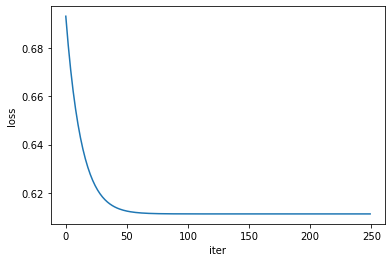

In [13]:
## Plot loss as function of iteration history
df = pd.DataFrame({'iter':jnp.arange(len(l)), 'loss':jnp.array(l)})
sns.lineplot(data=df, x='iter', y='loss')

<AxesSubplot:>

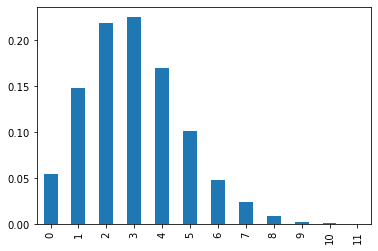

In [14]:
############################
## Poisson distirbution
############################
x = jax.random.poisson(key, lam=3.0, shape=(10000,))
pd.Series(x).value_counts(normalize=True).sort_index().plot.bar()

In [15]:
## Simple loss function (scalar parm = p; vector input data = x)
def pois_loss(mu, x):
    return -jnp.mean(jax.scipy.stats.poisson.logpmf(k=x, mu=mu))

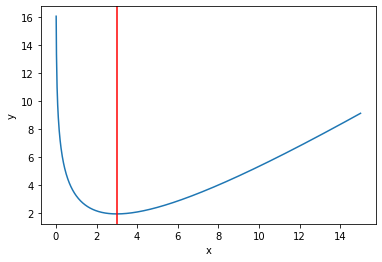

In [16]:
## Log Likelihood as a Function of Parameter (mu)
support = jnp.linspace(0.01,15,1000)
log_lik = jnp.array([pois_loss(mu=mu,x=x) for mu in support])

df = pd.DataFrame({'x':support, 'y':log_lik})
plt = sns.lineplot(data=df, x='x', y='y')
plt.axvline(3.0, color='red')

In [17]:
## Gradient of loss function
grad_mu = grad(pois_loss, argnums=0)

In [18]:
## Get gradient for each value of support
grad_support = jnp.array([grad_mu(mu,x) for mu in support])

In [19]:
## See what gradient is at minimizer (and what min value is)
df[['grad']] = grad_support

## Find minimizer
df = df.sort_values(by=['y'])
df.head(n=5)

,x,y,grad
199,2.995996,1.938973,-0.000135
200,3.011001,1.939008,0.004850
198,2.980991,1.939013,-0.005169
201,3.026006,1.939119,0.009784
197,2.965986,1.939129,-0.010254


In [20]:
#############################
## Simple gradient descent update
## Use "while" loop instead of "for" loop
#############################

## Initial rate parameter (guess)
mu = 0.5
## Step size
step_size = 0.025

## List to hold loss values for each update of the rate parameter
l = []

## Convergence flag (intialized to false)
conv_flag = False
## Convergence tolerance abs(loss_i - loss_{i-1})
conv_tol = 1e-5

## Iteration counter
i = 0

while conv_flag==False:
    ## Grab current loss
    current_loss = pois_loss(mu, x)
    l.append(current_loss)
    ## Print current parm/loss values to console for given iteration
    print_string = "Iteration=" + str(i) + "\t Loss=" + str(current_loss) + "\t mu=", str(mu)
    print(print_string)
    ## Update parm
    mu_new = mu - step_size*grad_mu(mu, x)
    ## Check for convergence
    diff_mu = jnp.abs(mu_new) - mu
    ## If convergence achieved that change conv_flag=True and break while loop
    if diff_mu < conv_tol:
        conv_flag=True
    ## Else if convergebce if not acheived maintain flag, increment iteration, update mu
    else:
        conv_flag=False
        i = i +1
        mu = mu_new

('Iteration=0\t Loss=4.807803\t mu=', '0.5')
('Iteration=1\t Loss=4.264859\t mu=', '0.62482')
('Iteration=2\t Loss=3.936102\t mu=', '0.7197105')
('Iteration=3\t Loss=3.7027993\t mu=', '0.79879403')
('Iteration=4\t Loss=3.5240862\t mu=', '0.8675729')
('Iteration=5\t Loss=3.3807163\t mu=', '0.9289172')
('Iteration=6\t Loss=3.262044\t mu=', '0.9845595')
('Iteration=7\t Loss=3.1615562\t mu=', '1.0356443')
('Iteration=8\t Loss=3.0749817\t mu=', '1.0829761')
('Iteration=9\t Loss=2.999367\t mu=', '1.1271466')
('Iteration=10\t Loss=2.9325886\t mu=', '1.1686064')
('Iteration=11\t Loss=2.8730712\t mu=', '1.2077084')
('Iteration=12\t Loss=2.819613\t mu=', '1.2447349')
('Iteration=13\t Loss=2.7712781\t mu=', '1.2799164')
('Iteration=14\t Loss=2.7273257\t mu=', '1.3134437')
('Iteration=15\t Loss=2.687157\t mu=', '1.345477')
('Iteration=16\t Loss=2.6502848\t mu=', '1.3761524')
('Iteration=17\t Loss=2.616305\t mu=', '1.4055867')
('Iteration=18\t Loss=2.5848808\t mu=', '1.4338812')
('Iteration=19\t Lo

('Iteration=163\t Loss=1.955437\t mu=', '2.6931725')
('Iteration=164\t Loss=1.9551215\t mu=', '2.6959872')
('Iteration=165\t Loss=1.9548129\t mu=', '2.698773')
('Iteration=166\t Loss=1.9545102\t mu=', '2.70153')
('Iteration=167\t Loss=1.9542139\t mu=', '2.7042587')
('Iteration=168\t Loss=1.9539238\t mu=', '2.7069595')
('Iteration=169\t Loss=1.9536393\t mu=', '2.7096326')
('Iteration=170\t Loss=1.9533606\t mu=', '2.7122784')
('Iteration=171\t Loss=1.9530877\t mu=', '2.7148972')
('Iteration=172\t Loss=1.9528203\t mu=', '2.7174892')
('Iteration=173\t Loss=1.9525586\t mu=', '2.720055')
('Iteration=174\t Loss=1.9523014\t mu=', '2.722595')
('Iteration=175\t Loss=1.9520496\t mu=', '2.725109')
('Iteration=176\t Loss=1.9518037\t mu=', '2.727598')
('Iteration=177\t Loss=1.9515622\t mu=', '2.7300618')
('Iteration=178\t Loss=1.9513254\t mu=', '2.7325008')
('Iteration=179\t Loss=1.9510932\t mu=', '2.7349153')
('Iteration=180\t Loss=1.9508656\t mu=', '2.7373054')
('Iteration=181\t Loss=1.9506432\t m

('Iteration=333\t Loss=1.9397432\t mu=', '2.9289908')
('Iteration=334\t Loss=1.9397297\t mu=', '2.9295661')
('Iteration=335\t Loss=1.9397168\t mu=', '2.9301364')
('Iteration=336\t Loss=1.9397041\t mu=', '2.9307017')
('Iteration=337\t Loss=1.9396915\t mu=', '2.9312623')
('Iteration=338\t Loss=1.9396793\t mu=', '2.9318178')
('Iteration=339\t Loss=1.9396676\t mu=', '2.9323685')
('Iteration=340\t Loss=1.9396557\t mu=', '2.9329145')
('Iteration=341\t Loss=1.9396437\t mu=', '2.9334557')
('Iteration=342\t Loss=1.939632\t mu=', '2.9339921')
('Iteration=343\t Loss=1.9396211\t mu=', '2.9345238')
('Iteration=344\t Loss=1.9396101\t mu=', '2.935051')
('Iteration=345\t Loss=1.9395988\t mu=', '2.9355736')
('Iteration=346\t Loss=1.9395884\t mu=', '2.9360917')
('Iteration=347\t Loss=1.9395782\t mu=', '2.9366052')
('Iteration=348\t Loss=1.9395676\t mu=', '2.9371142')
('Iteration=349\t Loss=1.9395572\t mu=', '2.937619')
('Iteration=350\t Loss=1.9395474\t mu=', '2.9381192')
('Iteration=351\t Loss=1.939537

('Iteration=495\t Loss=1.9390221\t mu=', '2.979343')
('Iteration=496\t Loss=1.9390211\t mu=', '2.979486')
('Iteration=497\t Loss=1.9390203\t mu=', '2.9796278')
('Iteration=498\t Loss=1.9390196\t mu=', '2.9797685')
('Iteration=499\t Loss=1.9390187\t mu=', '2.979908')
('Iteration=500\t Loss=1.9390178\t mu=', '2.9800463')
('Iteration=501\t Loss=1.9390169\t mu=', '2.9801834')
('Iteration=502\t Loss=1.9390165\t mu=', '2.9803195')
('Iteration=503\t Loss=1.9390159\t mu=', '2.9804544')
('Iteration=504\t Loss=1.9390153\t mu=', '2.9805882')
('Iteration=505\t Loss=1.9390144\t mu=', '2.9807208')
('Iteration=506\t Loss=1.9390137\t mu=', '2.9808524')
('Iteration=507\t Loss=1.9390129\t mu=', '2.9809828')
('Iteration=508\t Loss=1.9390125\t mu=', '2.981112')
('Iteration=509\t Loss=1.9390117\t mu=', '2.9812403')
('Iteration=510\t Loss=1.9390113\t mu=', '2.9813673')
('Iteration=511\t Loss=1.9390101\t mu=', '2.9814935')
('Iteration=512\t Loss=1.9390099\t mu=', '2.9816184')
('Iteration=513\t Loss=1.9390092

('Iteration=658\t Loss=1.9389765\t mu=', '2.9920642')
('Iteration=659\t Loss=1.9389764\t mu=', '2.9921005')
('Iteration=660\t Loss=1.9389764\t mu=', '2.9921365')
('Iteration=661\t Loss=1.9389764\t mu=', '2.992172')
('Iteration=662\t Loss=1.9389762\t mu=', '2.9922073')
('Iteration=663\t Loss=1.9389759\t mu=', '2.9922423')
('Iteration=664\t Loss=1.9389762\t mu=', '2.9922771')
('Iteration=665\t Loss=1.9389759\t mu=', '2.9923115')
('Iteration=666\t Loss=1.9389762\t mu=', '2.9923456')
('Iteration=667\t Loss=1.9389759\t mu=', '2.9923794')
('Iteration=668\t Loss=1.9389762\t mu=', '2.992413')
('Iteration=669\t Loss=1.9389759\t mu=', '2.9924464')
('Iteration=670\t Loss=1.9389759\t mu=', '2.9924796')
('Iteration=671\t Loss=1.9389759\t mu=', '2.9925122')
('Iteration=672\t Loss=1.9389758\t mu=', '2.9925447')
('Iteration=673\t Loss=1.9389756\t mu=', '2.9925768')
('Iteration=674\t Loss=1.9389758\t mu=', '2.9926088')
('Iteration=675\t Loss=1.9389758\t mu=', '2.9926405')
('Iteration=676\t Loss=1.93897

<AxesSubplot:xlabel='iter', ylabel='loss'>

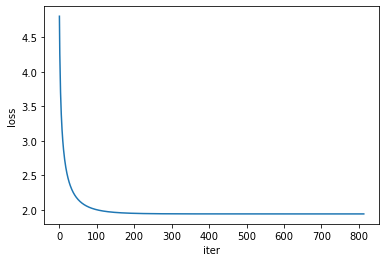

In [21]:
## Plot loss as function of iteration history
df = pd.DataFrame({'iter':jnp.arange(len(l)), 'loss':jnp.array(l)})
sns.lineplot(data=df, x='iter', y='loss')

In [22]:
## Scipy optimize - autograd through an optimization program?
from scipy.optimize import minimize

## Initial value mu
mu0 = 0.5

## Optimize for Poisson mean/rate parameter (using Autograd)
mu_bfgs = minimize(fun=pois_loss,
                                           x0=mu0,
                                           args=x,
                                           method='BFGS',
                                           jac=grad_mu)

## Output
print("Convergence achieved: ", mu_bfgs.success)
print("Mean=", mu_bfgs.x)

Convergence achieved:  False
Mean= [2.99631921]


In [23]:
#dir(jax.scipy)

In [24]:
## Wrapper for scipy.optimize.minimize so compatible with JAX
import numpy as onp
import scipy.optimize
from jax import grad, jit
from jax.tree_util import tree_flatten, tree_unflatten
from jax.flatten_util import ravel_pytree
from itertools import count

def minimize(fun, 
                        x0,
                        method=None,
                        args=(),
                        bounds=None,
                        constraints=(),
                        tol=None,
                        callback=None,
                        options=None
                        ):
    
    ## Use tree flatten/unflatten to convert initial params to pyTree format
    x0_flat, unravel = ravel_pytree(x0)
    
    ## Wrap objective to ONP arrays and product scalar output    
    def fun_wrapper(x_flat, *args):
        x = unravel(x_flat)
        return float(fun(x, *args))

    ## Wrap gradient to consume flat ONP arrays and product scalar output
    jac = jit(grad(fun))
    def jac_wrapper(x_flat, *args):
        x = unravel(x_flat)
        g_flat, _ = ravel_pytree(jac(x, *args))
        return onp.array(g_flat)
    
    ## Wrap the callback to consume a pytree
    def callback_wrapper(x_flat, *args):
        if callback is not None:
            x = unravel(x_flat)
            return callback(x, *args)
        
    ## Minimize with scipy
    results = scipy.optimize.minimize(fun_wrapper,
                                                             x0_flat,
                                                             args=args,
                                                             method=method,
                                                             jac=jac_wrapper,
                                                             callback=callback_wrapper,
                                                             bounds=bounds,
                                                             constraints=constraints,
                                                             tol=tol,
                                                             options=options)
    
    ## Pack the output into a PyTree
    #results["x"] = unravel(results(["x"]))
    return results

In [25]:
minimize(fun=pois_loss, 
                 x0=jnp.array([2.0]), 
                 method='BFGS', 
                 args=jnp.array(x),
                 options={'ftol':1e-9, 'disp':True})

/dshroot/users/cmeaney/.conda/envs/cmeaney_py37/lib/python3.7/site-packages/ipykernel_launcher.py:51: OptimizeWarning: Unknown solver options: ftol


         Current function value: 1.938973
         Iterations: 4
         Function evaluations: 61
         Gradient evaluations: 50


      fun: 1.9389734268188477
 hess_inv: array([[2.96739368]])
      jac: array([-0.00050867], dtype=float32)
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 61
      nit: 4
     njev: 50
   status: 2
  success: False
        x: array([2.99487634])

In [26]:
####################
## Normal density
####################

<AxesSubplot:xlabel='x', ylabel='y'>

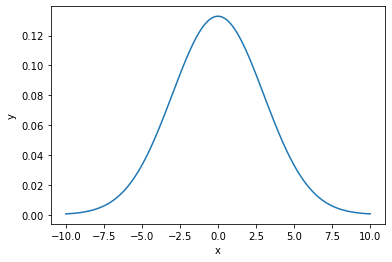

In [27]:
## Density function
x  = jnp.linspace(-10,10,1000)
#pd.Series(x).describe()

fx = jax.scipy.stats.norm.pdf(x=x, loc=0, scale=3)

df = pd.DataFrame({'x':x, 'y':fx})
sns.lineplot(data=df, x='x', y='y')

<AxesSubplot:xlabel='x', ylabel='y'>

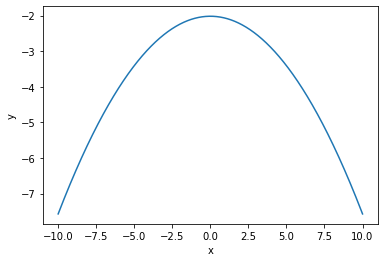

In [28]:
## Log-Density function

x  = jnp.linspace(-10,10,1000)
#pd.Series(x).describe()

log_fx = jax.scipy.stats.norm.logpdf(x=x, loc=0, scale=3)

df = pd.DataFrame({'x':x, 'y':log_fx})
sns.lineplot(data=df, x='x', y='y')

<AxesSubplot:xlabel='x', ylabel='y'>

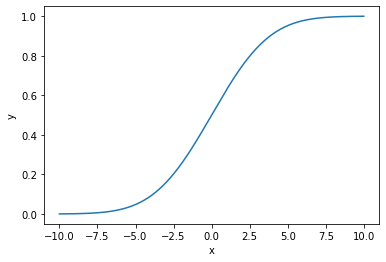

In [29]:
## Distribution function

x  = jnp.linspace(-10,10,1000)
#pd.Series(x).describe()

y = jax.scipy.stats.norm.cdf(x=x, loc=0, scale=3)

df = pd.DataFrame({'x':x, 'y':y})
sns.lineplot(data=df, x='x', y='y')

<AxesSubplot:ylabel='Frequency'>

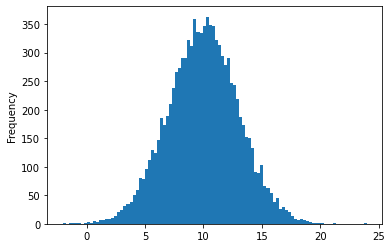

In [30]:
############################
## Normal distirbution
############################
s = 3
m = 10

x = jax.random.normal(key, shape=(10000,))
x = x*s + m

pd.Series(x).plot.hist(bins=100)

In [31]:
## Summary of simulated normal data
pd.Series(x).describe()

count    10000.000000
mean         9.977666
std          3.015233
min         -2.063173
25%          7.968843
50%         10.005677
75%         12.010670
max         23.992352
dtype: float64

In [32]:
## Simple loss function (scalar parm = p; vector input data = x)
def normal_loss(theta, x):
    mu = theta[0]
    sigma = jnp.exp(theta[1])
    return -jnp.mean(jax.scipy.stats.norm.logpdf(x=x, loc=mu, scale=sigma))

In [33]:
## Gradient of loss function
grad_theta = grad(normal_loss, argnums=0)

In [34]:
#############################
## Simple gradient descent update
## Use "while" loop instead of "for" loop
#############################

## Initial rate parameter (guess)
mu = 2.0
sigma = 2.0
theta = jnp.array([mu, sigma])

## Step size
step_size = 0.025

## List to hold loss values for each update of the rate parameter
l = []

## Convergence flag (intialized to false)
conv_flag = False
## Convergence tolerance abs(loss_i - loss_{i-1})
conv_tol = 1e-5

## Iteration counter
i = 0

while conv_flag==False:
    ## Grab current loss
    current_loss = normal_loss(theta, x)
    l.append(current_loss)
    ## Print current parm/loss values to console for given iteration
    print_string = "Iteration=" + str(i) + "\t Loss=" + str(current_loss) + "\t mu=" + str(theta[0]) + "\t sigma=" + str(theta[1])
    print(print_string)
    ## Update parm
    mu_new = mu - step_size*grad_theta(theta, x)[0]
    sigma_new = sigma - step_size*grad_theta(theta, x)[1]
    ## Check for convergence
    diff_mu = jnp.abs(mu_new) - mu
    diff_sigma = jnp.abs(sigma_new) - sigma
    ## If convergence achieved that change conv_flag=True and break while loop
    if (diff_mu < conv_tol) and (diff_sigma < conv_tol):
        conv_flag=True
    ## Else if convergebce if not acheived maintain flag, increment iteration, update mu
    else:
        conv_flag=False
        i = i +1
        mu = mu_new
        sigma = sigma_new
        theta = jnp.array([mu,sigma])

Iteration=0	 Loss=3.5850222	 mu=2.0	 sigma=2.0
Iteration=1	 Loss=3.5818305	 mu=2.0036528	 sigma=2.008304
Iteration=2	 Loss=3.579011	 mu=2.0072439	 sigma=2.0160334
Iteration=3	 Loss=3.5765102	 mu=2.0107782	 sigma=2.0232353
Iteration=4	 Loss=3.574284	 mu=2.0142605	 sigma=2.029952
Iteration=5	 Loss=3.572295	 mu=2.017695	 sigma=2.0362217
Iteration=6	 Loss=3.5705106	 mu=2.021085	 sigma=2.0420785
Iteration=7	 Loss=3.5689044	 mu=2.0244343	 sigma=2.047553
Iteration=8	 Loss=3.5674531	 mu=2.0277457	 sigma=2.0526738
Iteration=9	 Loss=3.5661368	 mu=2.0310218	 sigma=2.0574658
Iteration=10	 Loss=3.5649383	 mu=2.0342655	 sigma=2.0619524
Iteration=11	 Loss=3.5638425	 mu=2.037479	 sigma=2.0661547
Iteration=12	 Loss=3.5628378	 mu=2.0406642	 sigma=2.0700922
Iteration=13	 Loss=3.5619128	 mu=2.043823	 sigma=2.0737824
Iteration=14	 Loss=3.5610573	 mu=2.0469575	 sigma=2.0772421
Iteration=15	 Loss=3.5602636	 mu=2.050069	 sigma=2.080486
Iteration=16	 Loss=3.5595243	 mu=2.0531592	 sigma=2.083528
Iteration=17	 L

Iteration=145	 Loss=3.515732	 mu=2.4169753	 sigma=2.1030798
Iteration=146	 Loss=3.515411	 mu=2.4197922	 sigma=2.1027656
Iteration=147	 Loss=3.515089	 mu=2.4226098	 sigma=2.1024508
Iteration=148	 Loss=3.5147676	 mu=2.4254282	 sigma=2.102136
Iteration=149	 Loss=3.5144453	 mu=2.4282475	 sigma=2.1018205
Iteration=150	 Loss=3.5141234	 mu=2.4310675	 sigma=2.1015048
Iteration=151	 Loss=3.5138009	 mu=2.4338882	 sigma=2.101189
Iteration=152	 Loss=3.5134785	 mu=2.4367096	 sigma=2.1008725
Iteration=153	 Loss=3.513156	 mu=2.4395318	 sigma=2.100556
Iteration=154	 Loss=3.512833	 mu=2.4423547	 sigma=2.100239
Iteration=155	 Loss=3.51251	 mu=2.4451783	 sigma=2.0999217
Iteration=156	 Loss=3.512187	 mu=2.4480026	 sigma=2.0996041
Iteration=157	 Loss=3.5118637	 mu=2.4508276	 sigma=2.0992863
Iteration=158	 Loss=3.5115402	 mu=2.4536533	 sigma=2.0989683
Iteration=159	 Loss=3.5112164	 mu=2.4564798	 sigma=2.09865
Iteration=160	 Loss=3.5108929	 mu=2.459307	 sigma=2.0983315
Iteration=161	 Loss=3.510569	 mu=2.4621

Iteration=286	 Loss=3.4686437	 mu=2.8216734	 sigma=2.056573
Iteration=287	 Loss=3.468296	 mu=2.8245995	 sigma=2.0562296
Iteration=288	 Loss=3.467949	 mu=2.8275263	 sigma=2.055886
Iteration=289	 Loss=3.4676015	 mu=2.830454	 sigma=2.0555422
Iteration=290	 Loss=3.4672534	 mu=2.8333826	 sigma=2.0551982
Iteration=291	 Loss=3.466905	 mu=2.836312	 sigma=2.054854
Iteration=292	 Loss=3.466557	 mu=2.8392422	 sigma=2.0545096
Iteration=293	 Loss=3.4662087	 mu=2.8421733	 sigma=2.0541651
Iteration=294	 Loss=3.4658601	 mu=2.8451052	 sigma=2.0538204
Iteration=295	 Loss=3.4655108	 mu=2.8480377	 sigma=2.0534754
Iteration=296	 Loss=3.465162	 mu=2.8509712	 sigma=2.0531301
Iteration=297	 Loss=3.464813	 mu=2.8539054	 sigma=2.052785
Iteration=298	 Loss=3.4644637	 mu=2.8568406	 sigma=2.0524395
Iteration=299	 Loss=3.464114	 mu=2.8597765	 sigma=2.0520937
Iteration=300	 Loss=3.4637644	 mu=2.8627133	 sigma=2.0517478
Iteration=301	 Loss=3.463414	 mu=2.865651	 sigma=2.0514016
Iteration=302	 Loss=3.463064	 mu=2.8685

Iteration=424	 Loss=3.4187906	 mu=3.2333958	 sigma=2.0072865
Iteration=425	 Loss=3.4184148	 mu=3.2364392	 sigma=2.0069149
Iteration=426	 Loss=3.4180384	 mu=3.2394836	 sigma=2.006543
Iteration=427	 Loss=3.4176614	 mu=3.242529	 sigma=2.0061707
Iteration=428	 Loss=3.4172852	 mu=3.245575	 sigma=2.0057983
Iteration=429	 Loss=3.4169078	 mu=3.248622	 sigma=2.0054257
Iteration=430	 Loss=3.4165308	 mu=3.25167	 sigma=2.0050528
Iteration=431	 Loss=3.4161534	 mu=3.2547188	 sigma=2.0046797
Iteration=432	 Loss=3.4157758	 mu=3.2577684	 sigma=2.0043063
Iteration=433	 Loss=3.4153976	 mu=3.260819	 sigma=2.003933
Iteration=434	 Loss=3.4150195	 mu=3.2638705	 sigma=2.0035594
Iteration=435	 Loss=3.4146414	 mu=3.266923	 sigma=2.0031855
Iteration=436	 Loss=3.4142628	 mu=3.2699761	 sigma=2.0028114
Iteration=437	 Loss=3.413884	 mu=3.2730303	 sigma=2.002437
Iteration=438	 Loss=3.413505	 mu=3.2760854	 sigma=2.0020626
Iteration=439	 Loss=3.4131258	 mu=3.2791414	 sigma=2.0016878
Iteration=440	 Loss=3.4127464	 mu=3.

Iteration=562	 Loss=3.3646884	 mu=3.6620445	 sigma=1.9538287
Iteration=563	 Loss=3.3642788	 mu=3.6652162	 sigma=1.9534247
Iteration=564	 Loss=3.36387	 mu=3.6683888	 sigma=1.9530205
Iteration=565	 Loss=3.3634605	 mu=3.6715624	 sigma=1.952616
Iteration=566	 Loss=3.3630505	 mu=3.674737	 sigma=1.9522113
Iteration=567	 Loss=3.3626406	 mu=3.6779125	 sigma=1.9518063
Iteration=568	 Loss=3.3622305	 mu=3.681089	 sigma=1.9514011
Iteration=569	 Loss=3.36182	 mu=3.6842663	 sigma=1.9509957
Iteration=570	 Loss=3.3614094	 mu=3.6874447	 sigma=1.95059
Iteration=571	 Loss=3.3609982	 mu=3.690624	 sigma=1.9501841
Iteration=572	 Loss=3.3605871	 mu=3.6938043	 sigma=1.9497778
Iteration=573	 Loss=3.3601758	 mu=3.6969857	 sigma=1.9493713
Iteration=574	 Loss=3.359764	 mu=3.7001681	 sigma=1.9489646
Iteration=575	 Loss=3.3593516	 mu=3.7033515	 sigma=1.9485576
Iteration=576	 Loss=3.3589394	 mu=3.7065358	 sigma=1.9481504
Iteration=577	 Loss=3.358527	 mu=3.709721	 sigma=1.9477429
Iteration=578	 Loss=3.3581138	 mu=3.7

Iteration=699	 Loss=3.3061914	 mu=4.105836	 sigma=1.8960605
Iteration=700	 Loss=3.3057454	 mu=4.1091456	 sigma=1.8956201
Iteration=701	 Loss=3.3052988	 mu=4.112457	 sigma=1.8951794
Iteration=702	 Loss=3.3048522	 mu=4.115769	 sigma=1.8947384
Iteration=703	 Loss=3.3044055	 mu=4.119082	 sigma=1.8942972
Iteration=704	 Loss=3.3039577	 mu=4.122396	 sigma=1.8938557
Iteration=705	 Loss=3.303511	 mu=4.125711	 sigma=1.8934139
Iteration=706	 Loss=3.3030624	 mu=4.1290274	 sigma=1.8929718
Iteration=707	 Loss=3.302615	 mu=4.1323447	 sigma=1.8925294
Iteration=708	 Loss=3.3021665	 mu=4.135663	 sigma=1.8920867
Iteration=709	 Loss=3.301718	 mu=4.1389823	 sigma=1.8916438
Iteration=710	 Loss=3.301269	 mu=4.1423025	 sigma=1.8912005
Iteration=711	 Loss=3.3008199	 mu=4.145624	 sigma=1.8907571
Iteration=712	 Loss=3.3003702	 mu=4.148947	 sigma=1.8903133
Iteration=713	 Loss=3.2999203	 mu=4.1522703	 sigma=1.8898692
Iteration=714	 Loss=3.2994704	 mu=4.155595	 sigma=1.8894248
Iteration=715	 Loss=3.2990196	 mu=4.15

Iteration=837	 Loss=3.2418072	 mu=4.5727515	 sigma=1.8325047
Iteration=838	 Loss=3.2413197	 mu=4.576211	 sigma=1.8320229
Iteration=839	 Loss=3.2408307	 mu=4.579672	 sigma=1.8315408
Iteration=840	 Loss=3.240342	 mu=4.5831337	 sigma=1.8310584
Iteration=841	 Loss=3.2398531	 mu=4.586597	 sigma=1.8305756
Iteration=842	 Loss=3.2393637	 mu=4.590061	 sigma=1.8300925
Iteration=843	 Loss=3.2388737	 mu=4.5935264	 sigma=1.8296092
Iteration=844	 Loss=3.2383835	 mu=4.596993	 sigma=1.8291254
Iteration=845	 Loss=3.2378933	 mu=4.6004605	 sigma=1.8286414
Iteration=846	 Loss=3.2374027	 mu=4.603929	 sigma=1.8281571
Iteration=847	 Loss=3.2369118	 mu=4.607399	 sigma=1.8276724
Iteration=848	 Loss=3.23642	 mu=4.61087	 sigma=1.8271874
Iteration=849	 Loss=3.2359288	 mu=4.6143417	 sigma=1.8267021
Iteration=850	 Loss=3.2354364	 mu=4.617815	 sigma=1.8262165
Iteration=851	 Loss=3.234944	 mu=4.6212893	 sigma=1.8257306
Iteration=852	 Loss=3.234451	 mu=4.6247644	 sigma=1.8252443
Iteration=853	 Loss=3.2339585	 mu=4.628

Iteration=975	 Loss=3.1713073	 mu=5.060912	 sigma=1.7629218
Iteration=976	 Loss=3.1707726	 mu=5.0645294	 sigma=1.7623942
Iteration=977	 Loss=3.1702378	 mu=5.0681477	 sigma=1.7618662
Iteration=978	 Loss=3.169702	 mu=5.0717673	 sigma=1.7613379
Iteration=979	 Loss=3.169167	 mu=5.075388	 sigma=1.7608092
Iteration=980	 Loss=3.1686308	 mu=5.0790095	 sigma=1.7602801
Iteration=981	 Loss=3.1680946	 mu=5.0826325	 sigma=1.7597507
Iteration=982	 Loss=3.1675577	 mu=5.0862565	 sigma=1.759221
Iteration=983	 Loss=3.167021	 mu=5.089882	 sigma=1.7586908
Iteration=984	 Loss=3.1664834	 mu=5.0935082	 sigma=1.7581604
Iteration=985	 Loss=3.165946	 mu=5.0971355	 sigma=1.7576296
Iteration=986	 Loss=3.165408	 mu=5.1007643	 sigma=1.7570986
Iteration=987	 Loss=3.1648693	 mu=5.104394	 sigma=1.7565671
Iteration=988	 Loss=3.1643307	 mu=5.108025	 sigma=1.7560353
Iteration=989	 Loss=3.1637914	 mu=5.111657	 sigma=1.7555032
Iteration=990	 Loss=3.1632519	 mu=5.1152906	 sigma=1.7549707
Iteration=991	 Loss=3.1627126	 mu=5.

Iteration=1113	 Loss=3.0941973	 mu=5.5709586	 sigma=1.686786
Iteration=1114	 Loss=3.0936136	 mu=5.5747337	 sigma=1.6862097
Iteration=1115	 Loss=3.09303	 mu=5.57851	 sigma=1.685633
Iteration=1116	 Loss=3.092446	 mu=5.5822873	 sigma=1.6850559
Iteration=1117	 Loss=3.0918612	 mu=5.586066	 sigma=1.6844784
Iteration=1118	 Loss=3.0912764	 mu=5.589845	 sigma=1.6839006
Iteration=1119	 Loss=3.0906916	 mu=5.593626	 sigma=1.6833224
Iteration=1120	 Loss=3.0901058	 mu=5.597408	 sigma=1.6827439
Iteration=1121	 Loss=3.0895197	 mu=5.6011906	 sigma=1.682165
Iteration=1122	 Loss=3.0889337	 mu=5.6049747	 sigma=1.6815858
Iteration=1123	 Loss=3.088347	 mu=5.60876	 sigma=1.6810062
Iteration=1124	 Loss=3.0877604	 mu=5.612546	 sigma=1.6804264
Iteration=1125	 Loss=3.0871727	 mu=5.6163335	 sigma=1.6798462
Iteration=1126	 Loss=3.086585	 mu=5.620122	 sigma=1.6792656
Iteration=1127	 Loss=3.0859973	 mu=5.6239114	 sigma=1.6786847
Iteration=1128	 Loss=3.085409	 mu=5.627702	 sigma=1.6781034
Iteration=1129	 Loss=3.08482

Iteration=1251	 Loss=3.0104353	 mu=6.1020365	 sigma=1.6039655
Iteration=1252	 Loss=3.009806	 mu=6.1059546	 sigma=1.603342
Iteration=1253	 Loss=3.0091753	 mu=6.109874	 sigma=1.6027184
Iteration=1254	 Loss=3.0085454	 mu=6.113794	 sigma=1.6020943
Iteration=1255	 Loss=3.0079145	 mu=6.117715	 sigma=1.6014699
Iteration=1256	 Loss=3.0072837	 mu=6.121637	 sigma=1.6008452
Iteration=1257	 Loss=3.006652	 mu=6.12556	 sigma=1.6002202
Iteration=1258	 Loss=3.006021	 mu=6.1294837	 sigma=1.5995948
Iteration=1259	 Loss=3.0053887	 mu=6.1334085	 sigma=1.5989692
Iteration=1260	 Loss=3.004757	 mu=6.1373343	 sigma=1.5983433
Iteration=1261	 Loss=3.0041242	 mu=6.1412606	 sigma=1.597717
Iteration=1262	 Loss=3.0034916	 mu=6.145188	 sigma=1.5970905
Iteration=1263	 Loss=3.0028586	 mu=6.149116	 sigma=1.5964636
Iteration=1264	 Loss=3.002225	 mu=6.153045	 sigma=1.5958364
Iteration=1265	 Loss=3.0015917	 mu=6.1569753	 sigma=1.5952089
Iteration=1266	 Loss=3.0009577	 mu=6.1609063	 sigma=1.5945811
Iteration=1267	 Loss=3.0

Iteration=1389	 Loss=2.9210227	 mu=6.650269	 sigma=1.5152686
Iteration=1390	 Loss=2.9203598	 mu=6.654286	 sigma=1.5146093
Iteration=1391	 Loss=2.9196968	 mu=6.6583033	 sigma=1.5139499
Iteration=1392	 Loss=2.9190338	 mu=6.662321	 sigma=1.5132903
Iteration=1393	 Loss=2.9183702	 mu=6.6663394	 sigma=1.5126305
Iteration=1394	 Loss=2.9177067	 mu=6.670358	 sigma=1.5119705
Iteration=1395	 Loss=2.9170432	 mu=6.6743774	 sigma=1.5113105
Iteration=1396	 Loss=2.9163795	 mu=6.678397	 sigma=1.5106502
Iteration=1397	 Loss=2.9157157	 mu=6.6824174	 sigma=1.5099897
Iteration=1398	 Loss=2.9150515	 mu=6.6864376	 sigma=1.5093291
Iteration=1399	 Loss=2.9143872	 mu=6.6904583	 sigma=1.5086683
Iteration=1400	 Loss=2.913723	 mu=6.6944795	 sigma=1.5080073
Iteration=1401	 Loss=2.9130585	 mu=6.698501	 sigma=1.5073462
Iteration=1402	 Loss=2.912394	 mu=6.702523	 sigma=1.5066849
Iteration=1403	 Loss=2.9117296	 mu=6.7065454	 sigma=1.5060234
Iteration=1404	 Loss=2.9110644	 mu=6.710568	 sigma=1.5053618
Iteration=1405	 Lo

Iteration=1527	 Loss=2.8289437	 mu=7.2063446	 sigma=1.4233367
Iteration=1528	 Loss=2.828279	 mu=7.210366	 sigma=1.4226701
Iteration=1529	 Loss=2.8276145	 mu=7.2143865	 sigma=1.4220036
Iteration=1530	 Loss=2.8269503	 mu=7.2184067	 sigma=1.4213372
Iteration=1531	 Loss=2.8262868	 mu=7.2224264	 sigma=1.420671
Iteration=1532	 Loss=2.8256223	 mu=7.226445	 sigma=1.4200048
Iteration=1533	 Loss=2.824959	 mu=7.2304635	 sigma=1.4193388
Iteration=1534	 Loss=2.8242958	 mu=7.2344813	 sigma=1.4186729
Iteration=1535	 Loss=2.8236325	 mu=7.2384987	 sigma=1.4180071
Iteration=1536	 Loss=2.8229694	 mu=7.2425156	 sigma=1.4173415
Iteration=1537	 Loss=2.8223062	 mu=7.246532	 sigma=1.4166759
Iteration=1538	 Loss=2.8216436	 mu=7.250548	 sigma=1.4160105
Iteration=1539	 Loss=2.8209813	 mu=7.2545633	 sigma=1.4153452
Iteration=1540	 Loss=2.8203187	 mu=7.258578	 sigma=1.41468
Iteration=1541	 Loss=2.819657	 mu=7.262592	 sigma=1.414015
Iteration=1542	 Loss=2.8189945	 mu=7.2666054	 sigma=1.4133502
Iteration=1543	 Loss=

Iteration=1665	 Loss=2.7401009	 mu=7.7526603	 sigma=1.3336245
Iteration=1666	 Loss=2.7394886	 mu=7.756523	 sigma=1.3330014
Iteration=1667	 Loss=2.7388766	 mu=7.760384	 sigma=1.3323787
Iteration=1668	 Loss=2.7382658	 mu=7.764243	 sigma=1.3317567
Iteration=1669	 Loss=2.7376554	 mu=7.7681003	 sigma=1.3311353
Iteration=1670	 Loss=2.7370458	 mu=7.7719555	 sigma=1.3305143
Iteration=1671	 Loss=2.7364364	 mu=7.775809	 sigma=1.329894
Iteration=1672	 Loss=2.7358282	 mu=7.77966	 sigma=1.3292742
Iteration=1673	 Loss=2.73522	 mu=7.7835093	 sigma=1.3286549
Iteration=1674	 Loss=2.734613	 mu=7.7873564	 sigma=1.3280362
Iteration=1675	 Loss=2.7340062	 mu=7.7912016	 sigma=1.3274181
Iteration=1676	 Loss=2.7334003	 mu=7.795045	 sigma=1.3268006
Iteration=1677	 Loss=2.7327952	 mu=7.7988863	 sigma=1.3261837
Iteration=1678	 Loss=2.7321901	 mu=7.8027253	 sigma=1.3255674
Iteration=1679	 Loss=2.7315865	 mu=7.8065624	 sigma=1.3249516
Iteration=1680	 Loss=2.7309835	 mu=7.8103976	 sigma=1.3243364
Iteration=1681	 Los

Iteration=1803	 Loss=2.6628208	 mu=8.262729	 sigma=1.2542211
Iteration=1804	 Loss=2.6623232	 mu=8.266218	 sigma=1.2537042
Iteration=1805	 Loss=2.6618268	 mu=8.269705	 sigma=1.2531883
Iteration=1806	 Loss=2.6613312	 mu=8.273188	 sigma=1.2526733
Iteration=1807	 Loss=2.6608365	 mu=8.276667	 sigma=1.2521592
Iteration=1808	 Loss=2.6603432	 mu=8.280142	 sigma=1.2516462
Iteration=1809	 Loss=2.6598506	 mu=8.283614	 sigma=1.251134
Iteration=1810	 Loss=2.659359	 mu=8.287083	 sigma=1.250623
Iteration=1811	 Loss=2.658869	 mu=8.290547	 sigma=1.2501129
Iteration=1812	 Loss=2.6583798	 mu=8.294009	 sigma=1.2496037
Iteration=1813	 Loss=2.657891	 mu=8.297467	 sigma=1.2490956
Iteration=1814	 Loss=2.6574035	 mu=8.300921	 sigma=1.2485884
Iteration=1815	 Loss=2.6569173	 mu=8.304372	 sigma=1.2480823
Iteration=1816	 Loss=2.6564326	 mu=8.307818	 sigma=1.2475771
Iteration=1817	 Loss=2.6559482	 mu=8.311262	 sigma=1.2470729
Iteration=1818	 Loss=2.6554651	 mu=8.314702	 sigma=1.2465698
Iteration=1819	 Loss=2.654983

Iteration=1941	 Loss=2.604338	 mu=8.707217	 sigma=1.1927825
Iteration=1942	 Loss=2.6039908	 mu=8.71014	 sigma=1.1924133
Iteration=1943	 Loss=2.6036453	 mu=8.713058	 sigma=1.1920453
Iteration=1944	 Loss=2.6033	 mu=8.715973	 sigma=1.1916784
Iteration=1945	 Loss=2.6029565	 mu=8.718883	 sigma=1.1913126
Iteration=1946	 Loss=2.6026137	 mu=8.721787	 sigma=1.1909478
Iteration=1947	 Loss=2.6022725	 mu=8.724688	 sigma=1.1905842
Iteration=1948	 Loss=2.6019323	 mu=8.727583	 sigma=1.1902217
Iteration=1949	 Loss=2.6015933	 mu=8.730474	 sigma=1.1898602
Iteration=1950	 Loss=2.6012547	 mu=8.733361	 sigma=1.1895
Iteration=1951	 Loss=2.6009176	 mu=8.736243	 sigma=1.1891408
Iteration=1952	 Loss=2.6005814	 mu=8.7391205	 sigma=1.1887827
Iteration=1953	 Loss=2.6002467	 mu=8.741993	 sigma=1.1884257
Iteration=1954	 Loss=2.5999131	 mu=8.744861	 sigma=1.1880698
Iteration=1955	 Loss=2.5995803	 mu=8.747725	 sigma=1.187715
Iteration=1956	 Loss=2.5992482	 mu=8.750584	 sigma=1.1873614
Iteration=1957	 Loss=2.5989182	 

Iteration=2079	 Loss=2.5662951	 mu=9.066374	 sigma=1.151898
Iteration=2080	 Loss=2.5660863	 mu=9.068649	 sigma=1.1516709
Iteration=2081	 Loss=2.5658782	 mu=9.07092	 sigma=1.1514448
Iteration=2082	 Loss=2.5656707	 mu=9.073186	 sigma=1.1512195
Iteration=2083	 Loss=2.5654647	 mu=9.075447	 sigma=1.1509951
Iteration=2084	 Loss=2.565259	 mu=9.077704	 sigma=1.1507716
Iteration=2085	 Loss=2.5650542	 mu=9.079957	 sigma=1.150549
Iteration=2086	 Loss=2.56485	 mu=9.082205	 sigma=1.1503273
Iteration=2087	 Loss=2.5646474	 mu=9.084448	 sigma=1.1501065
Iteration=2088	 Loss=2.5644453	 mu=9.086686	 sigma=1.1498866
Iteration=2089	 Loss=2.564244	 mu=9.08892	 sigma=1.1496676
Iteration=2090	 Loss=2.5640435	 mu=9.091148	 sigma=1.1494495
Iteration=2091	 Loss=2.5638437	 mu=9.093373	 sigma=1.1492323
Iteration=2092	 Loss=2.5636451	 mu=9.095593	 sigma=1.1490159
Iteration=2093	 Loss=2.563447	 mu=9.097809	 sigma=1.1488004
Iteration=2094	 Loss=2.56325	 mu=9.100019	 sigma=1.1485858
Iteration=2095	 Loss=2.5630538	 mu=

Iteration=2217	 Loss=2.5445757	 mu=9.3381405	 sigma=1.128123
Iteration=2218	 Loss=2.5444627	 mu=9.339815	 sigma=1.1279987
Iteration=2219	 Loss=2.5443509	 mu=9.341486	 sigma=1.127875
Iteration=2220	 Loss=2.5442393	 mu=9.343153	 sigma=1.1277518
Iteration=2221	 Loss=2.5441284	 mu=9.344816	 sigma=1.1276293
Iteration=2222	 Loss=2.5440176	 mu=9.346475	 sigma=1.1275073
Iteration=2223	 Loss=2.5439079	 mu=9.348129	 sigma=1.1273859
Iteration=2224	 Loss=2.5437982	 mu=9.34978	 sigma=1.127265
Iteration=2225	 Loss=2.5436893	 mu=9.351427	 sigma=1.1271447
Iteration=2226	 Loss=2.543581	 mu=9.35307	 sigma=1.127025
Iteration=2227	 Loss=2.5434728	 mu=9.35471	 sigma=1.1269059
Iteration=2228	 Loss=2.5433657	 mu=9.356345	 sigma=1.1267873
Iteration=2229	 Loss=2.5432587	 mu=9.357977	 sigma=1.1266693
Iteration=2230	 Loss=2.543152	 mu=9.359604	 sigma=1.1265519
Iteration=2231	 Loss=2.5430465	 mu=9.361227	 sigma=1.1264349
Iteration=2232	 Loss=2.542941	 mu=9.362846	 sigma=1.1263186
Iteration=2233	 Loss=2.5428364	 m

Iteration=2356	 Loss=2.533195	 mu=9.535743	 sigma=1.1155125
Iteration=2357	 Loss=2.5331388	 mu=9.536929	 sigma=1.1154497
Iteration=2358	 Loss=2.5330825	 mu=9.538113	 sigma=1.1153872
Iteration=2359	 Loss=2.533027	 mu=9.539293	 sigma=1.1153251
Iteration=2360	 Loss=2.5329714	 mu=9.540471	 sigma=1.1152632
Iteration=2361	 Loss=2.532916	 mu=9.541646	 sigma=1.1152017
Iteration=2362	 Loss=2.5328608	 mu=9.542818	 sigma=1.1151404
Iteration=2363	 Loss=2.5328062	 mu=9.543986	 sigma=1.1150795
Iteration=2364	 Loss=2.5327518	 mu=9.545152	 sigma=1.115019
Iteration=2365	 Loss=2.5326974	 mu=9.546314	 sigma=1.1149586
Iteration=2366	 Loss=2.5326436	 mu=9.547474	 sigma=1.1148987
Iteration=2367	 Loss=2.5325902	 mu=9.548631	 sigma=1.114839
Iteration=2368	 Loss=2.532537	 mu=9.549785	 sigma=1.1147796
Iteration=2369	 Loss=2.5324836	 mu=9.550936	 sigma=1.1147206
Iteration=2370	 Loss=2.5324311	 mu=9.552084	 sigma=1.1146618
Iteration=2371	 Loss=2.5323784	 mu=9.553228	 sigma=1.1146034
Iteration=2372	 Loss=2.5323265

Iteration=2497	 Loss=2.5275464	 mu=9.676005	 sigma=1.1092099
Iteration=2498	 Loss=2.5275192	 mu=9.676826	 sigma=1.1091797
Iteration=2499	 Loss=2.5274923	 mu=9.677644	 sigma=1.1091498
Iteration=2500	 Loss=2.527466	 mu=9.67846	 sigma=1.10912
Iteration=2501	 Loss=2.5274396	 mu=9.679274	 sigma=1.1090903
Iteration=2502	 Loss=2.5274131	 mu=9.680085	 sigma=1.1090609
Iteration=2503	 Loss=2.5273871	 mu=9.680895	 sigma=1.1090316
Iteration=2504	 Loss=2.5273607	 mu=9.681703	 sigma=1.1090024
Iteration=2505	 Loss=2.527335	 mu=9.6825075	 sigma=1.1089734
Iteration=2506	 Loss=2.527309	 mu=9.6833105	 sigma=1.1089445
Iteration=2507	 Loss=2.5272834	 mu=9.684112	 sigma=1.1089158
Iteration=2508	 Loss=2.527258	 mu=9.684911	 sigma=1.1088873
Iteration=2509	 Loss=2.5272326	 mu=9.685707	 sigma=1.108859
Iteration=2510	 Loss=2.5272074	 mu=9.6865015	 sigma=1.1088307
Iteration=2511	 Loss=2.5271823	 mu=9.687294	 sigma=1.1088026
Iteration=2512	 Loss=2.5271573	 mu=9.688085	 sigma=1.1087747
Iteration=2513	 Loss=2.527132

Iteration=2635	 Loss=2.524915	 mu=9.770765	 sigma=1.1062634
Iteration=2636	 Loss=2.524902	 mu=9.771331	 sigma=1.1062491
Iteration=2637	 Loss=2.524889	 mu=9.771895	 sigma=1.1062348
Iteration=2638	 Loss=2.5248766	 mu=9.772458	 sigma=1.1062206
Iteration=2639	 Loss=2.524864	 mu=9.77302	 sigma=1.1062064
Iteration=2640	 Loss=2.5248518	 mu=9.77358	 sigma=1.1061924
Iteration=2641	 Loss=2.5248392	 mu=9.774138	 sigma=1.1061784
Iteration=2642	 Loss=2.5248265	 mu=9.774695	 sigma=1.1061645
Iteration=2643	 Loss=2.5248144	 mu=9.77525	 sigma=1.1061506
Iteration=2644	 Loss=2.5248022	 mu=9.7758045	 sigma=1.1061369
Iteration=2645	 Loss=2.52479	 mu=9.776357	 sigma=1.1061232
Iteration=2646	 Loss=2.5247777	 mu=9.776908	 sigma=1.1061096
Iteration=2647	 Loss=2.5247657	 mu=9.777457	 sigma=1.106096
Iteration=2648	 Loss=2.5247533	 mu=9.778005	 sigma=1.1060826
Iteration=2649	 Loss=2.5247416	 mu=9.778551	 sigma=1.1060692
Iteration=2650	 Loss=2.52473	 mu=9.779096	 sigma=1.1060559
Iteration=2651	 Loss=2.524718	 mu=9

Iteration=2775	 Loss=2.5236566	 mu=9.836757	 sigma=1.1048521
Iteration=2776	 Loss=2.5236506	 mu=9.837143	 sigma=1.1048454
Iteration=2777	 Loss=2.5236444	 mu=9.837528	 sigma=1.1048387
Iteration=2778	 Loss=2.523639	 mu=9.837913	 sigma=1.104832
Iteration=2779	 Loss=2.523633	 mu=9.838296	 sigma=1.1048255
Iteration=2780	 Loss=2.523627	 mu=9.838678	 sigma=1.1048189
Iteration=2781	 Loss=2.5236213	 mu=9.83906	 sigma=1.1048124
Iteration=2782	 Loss=2.5236154	 mu=9.83944	 sigma=1.104806
Iteration=2783	 Loss=2.5236099	 mu=9.83982	 sigma=1.1047995
Iteration=2784	 Loss=2.5236044	 mu=9.8401985	 sigma=1.1047931
Iteration=2785	 Loss=2.5235984	 mu=9.840575	 sigma=1.1047866
Iteration=2786	 Loss=2.5235927	 mu=9.840951	 sigma=1.1047803
Iteration=2787	 Loss=2.5235872	 mu=9.841326	 sigma=1.104774
Iteration=2788	 Loss=2.5235813	 mu=9.8417	 sigma=1.1047677
Iteration=2789	 Loss=2.523576	 mu=9.8420725	 sigma=1.1047615
Iteration=2790	 Loss=2.5235705	 mu=9.842444	 sigma=1.1047553
Iteration=2791	 Loss=2.523565	 mu=

Iteration=2913	 Loss=2.523077	 mu=9.881241	 sigma=1.1042012
Iteration=2914	 Loss=2.5230742	 mu=9.881506	 sigma=1.1041981
Iteration=2915	 Loss=2.5230713	 mu=9.88177	 sigma=1.104195
Iteration=2916	 Loss=2.5230687	 mu=9.882033	 sigma=1.1041919
Iteration=2917	 Loss=2.5230658	 mu=9.882296	 sigma=1.1041888
Iteration=2918	 Loss=2.523063	 mu=9.882558	 sigma=1.1041857
Iteration=2919	 Loss=2.5230606	 mu=9.882819	 sigma=1.1041826
Iteration=2920	 Loss=2.5230575	 mu=9.88308	 sigma=1.1041795
Iteration=2921	 Loss=2.5230548	 mu=9.883339	 sigma=1.1041765
Iteration=2922	 Loss=2.523052	 mu=9.883598	 sigma=1.1041735
Iteration=2923	 Loss=2.5230498	 mu=9.883857	 sigma=1.1041706
Iteration=2924	 Loss=2.523047	 mu=9.884114	 sigma=1.1041676
Iteration=2925	 Loss=2.523044	 mu=9.884371	 sigma=1.1041646
Iteration=2926	 Loss=2.5230417	 mu=9.884627	 sigma=1.1041616
Iteration=2927	 Loss=2.5230386	 mu=9.884883	 sigma=1.1041586
Iteration=2928	 Loss=2.5230365	 mu=9.885138	 sigma=1.1041558
Iteration=2929	 Loss=2.523034	 m

Iteration=3051	 Loss=2.522805	 mu=9.911706	 sigma=1.1038959
Iteration=3052	 Loss=2.522804	 mu=9.911887	 sigma=1.1038945
Iteration=3053	 Loss=2.5228026	 mu=9.912068	 sigma=1.103893
Iteration=3054	 Loss=2.5228007	 mu=9.912249	 sigma=1.1038916
Iteration=3055	 Loss=2.5228	 mu=9.912429	 sigma=1.1038902
Iteration=3056	 Loss=2.5227985	 mu=9.912608	 sigma=1.1038888
Iteration=3057	 Loss=2.522797	 mu=9.912787	 sigma=1.1038873
Iteration=3058	 Loss=2.5227957	 mu=9.912966	 sigma=1.1038859
Iteration=3059	 Loss=2.522795	 mu=9.913143	 sigma=1.1038845
Iteration=3060	 Loss=2.5227938	 mu=9.913321	 sigma=1.103883
Iteration=3061	 Loss=2.522792	 mu=9.913497	 sigma=1.1038816
Iteration=3062	 Loss=2.5227907	 mu=9.913673	 sigma=1.1038802
Iteration=3063	 Loss=2.52279	 mu=9.913849	 sigma=1.1038787
Iteration=3064	 Loss=2.5227888	 mu=9.914024	 sigma=1.1038773
Iteration=3065	 Loss=2.5227876	 mu=9.914199	 sigma=1.103876
Iteration=3066	 Loss=2.5227864	 mu=9.914373	 sigma=1.1038747
Iteration=3067	 Loss=2.5227847	 mu=9.

Iteration=3189	 Loss=2.5226777	 mu=9.932552	 sigma=1.1037532
Iteration=3190	 Loss=2.5226774	 mu=9.932676	 sigma=1.1037525
Iteration=3191	 Loss=2.5226765	 mu=9.9328	 sigma=1.1037518
Iteration=3192	 Loss=2.5226758	 mu=9.932923	 sigma=1.1037511
Iteration=3193	 Loss=2.5226753	 mu=9.933046	 sigma=1.1037503
Iteration=3194	 Loss=2.5226746	 mu=9.933169	 sigma=1.1037496
Iteration=3195	 Loss=2.522674	 mu=9.933291	 sigma=1.1037489
Iteration=3196	 Loss=2.5226734	 mu=9.9334135	 sigma=1.1037482
Iteration=3197	 Loss=2.522673	 mu=9.933536	 sigma=1.1037475
Iteration=3198	 Loss=2.5226722	 mu=9.933657	 sigma=1.1037468
Iteration=3199	 Loss=2.5226722	 mu=9.933778	 sigma=1.1037462
Iteration=3200	 Loss=2.522671	 mu=9.933899	 sigma=1.1037456
Iteration=3201	 Loss=2.5226705	 mu=9.934019	 sigma=1.103745
Iteration=3202	 Loss=2.52267	 mu=9.934139	 sigma=1.1037444
Iteration=3203	 Loss=2.5226696	 mu=9.934258	 sigma=1.1037438
Iteration=3204	 Loss=2.5226688	 mu=9.934378	 sigma=1.1037432
Iteration=3205	 Loss=2.5226684	

Iteration=3326	 Loss=2.5226183	 mu=9.946727	 sigma=1.1036867
Iteration=3327	 Loss=2.5226178	 mu=9.946812	 sigma=1.1036863
Iteration=3328	 Loss=2.5226176	 mu=9.946897	 sigma=1.103686
Iteration=3329	 Loss=2.5226176	 mu=9.946981	 sigma=1.1036856
Iteration=3330	 Loss=2.522617	 mu=9.947065	 sigma=1.1036853
Iteration=3331	 Loss=2.522617	 mu=9.947149	 sigma=1.1036849
Iteration=3332	 Loss=2.5226166	 mu=9.947233	 sigma=1.1036845
Iteration=3333	 Loss=2.5226164	 mu=9.947317	 sigma=1.1036842
Iteration=3334	 Loss=2.5226161	 mu=9.947401	 sigma=1.1036838
Iteration=3335	 Loss=2.522616	 mu=9.947484	 sigma=1.1036835
Iteration=3336	 Loss=2.5226154	 mu=9.947567	 sigma=1.1036831
Iteration=3337	 Loss=2.5226152	 mu=9.94765	 sigma=1.1036828
Iteration=3338	 Loss=2.5226152	 mu=9.947733	 sigma=1.1036824
Iteration=3339	 Loss=2.522615	 mu=9.947815	 sigma=1.1036822
Iteration=3340	 Loss=2.5226142	 mu=9.947897	 sigma=1.1036818
Iteration=3341	 Loss=2.5226142	 mu=9.947979	 sigma=1.1036816
Iteration=3342	 Loss=2.522614	

Iteration=3464	 Loss=2.5225904	 mu=9.956509	 sigma=1.1036552
Iteration=3465	 Loss=2.5225902	 mu=9.956567	 sigma=1.1036551
Iteration=3466	 Loss=2.5225902	 mu=9.956625	 sigma=1.103655
Iteration=3467	 Loss=2.52259	 mu=9.956683	 sigma=1.1036549
Iteration=3468	 Loss=2.52259	 mu=9.956741	 sigma=1.1036547
Iteration=3469	 Loss=2.52259	 mu=9.956799	 sigma=1.1036545
Iteration=3470	 Loss=2.5225897	 mu=9.956856	 sigma=1.1036544
Iteration=3471	 Loss=2.5225894	 mu=9.956913	 sigma=1.1036543
Iteration=3472	 Loss=2.5225894	 mu=9.95697	 sigma=1.1036541
Iteration=3473	 Loss=2.5225892	 mu=9.957027	 sigma=1.103654
Iteration=3474	 Loss=2.522589	 mu=9.957085	 sigma=1.1036539
Iteration=3475	 Loss=2.522589	 mu=9.957141	 sigma=1.1036538
Iteration=3476	 Loss=2.522589	 mu=9.957197	 sigma=1.1036537
Iteration=3477	 Loss=2.522589	 mu=9.957253	 sigma=1.1036536
Iteration=3478	 Loss=2.5225883	 mu=9.95731	 sigma=1.1036534
Iteration=3479	 Loss=2.522588	 mu=9.957366	 sigma=1.1036533
Iteration=3480	 Loss=2.5225883	 mu=9.95

Iteration=3602	 Loss=2.522577	 mu=9.963197	 sigma=1.1036398
Iteration=3603	 Loss=2.522577	 mu=9.963237	 sigma=1.1036397
Iteration=3604	 Loss=2.522577	 mu=9.963277	 sigma=1.1036397
Iteration=3605	 Loss=2.522577	 mu=9.963316	 sigma=1.1036397
Iteration=3606	 Loss=2.522577	 mu=9.963355	 sigma=1.1036396
Iteration=3607	 Loss=2.5225768	 mu=9.963394	 sigma=1.1036395
Iteration=3608	 Loss=2.5225766	 mu=9.963433	 sigma=1.1036394
Iteration=3609	 Loss=2.5225766	 mu=9.963472	 sigma=1.1036394
Iteration=3610	 Loss=2.5225766	 mu=9.963511	 sigma=1.1036394
Iteration=3611	 Loss=2.522577	 mu=9.963551	 sigma=1.1036394
Iteration=3612	 Loss=2.5225768	 mu=9.96359	 sigma=1.1036392
Iteration=3613	 Loss=2.5225766	 mu=9.963629	 sigma=1.1036391
Iteration=3614	 Loss=2.5225766	 mu=9.963667	 sigma=1.1036391
Iteration=3615	 Loss=2.5225766	 mu=9.963705	 sigma=1.103639
Iteration=3616	 Loss=2.5225766	 mu=9.963743	 sigma=1.1036389
Iteration=3617	 Loss=2.5225766	 mu=9.963781	 sigma=1.1036389
Iteration=3618	 Loss=2.522576	 m

Iteration=3740	 Loss=2.522571	 mu=9.967771	 sigma=1.1036338
Iteration=3741	 Loss=2.522571	 mu=9.967798	 sigma=1.1036338
Iteration=3742	 Loss=2.5225716	 mu=9.967825	 sigma=1.1036336
Iteration=3743	 Loss=2.522571	 mu=9.967852	 sigma=1.1036336
Iteration=3744	 Loss=2.5225713	 mu=9.967878	 sigma=1.1036336
Iteration=3745	 Loss=2.5225713	 mu=9.967905	 sigma=1.1036336
Iteration=3746	 Loss=2.522571	 mu=9.967932	 sigma=1.1036335
Iteration=3747	 Loss=2.522571	 mu=9.967958	 sigma=1.1036335
Iteration=3748	 Loss=2.522571	 mu=9.967985	 sigma=1.1036335
Iteration=3749	 Loss=2.5225708	 mu=9.968012	 sigma=1.1036334
Iteration=3750	 Loss=2.5225708	 mu=9.968039	 sigma=1.1036334
Iteration=3751	 Loss=2.5225708	 mu=9.968065	 sigma=1.1036334
Iteration=3752	 Loss=2.5225706	 mu=9.968092	 sigma=1.1036334
Iteration=3753	 Loss=2.5225706	 mu=9.968119	 sigma=1.1036334
Iteration=3754	 Loss=2.5225706	 mu=9.968145	 sigma=1.1036333
Iteration=3755	 Loss=2.5225706	 mu=9.968171	 sigma=1.1036333
Iteration=3756	 Loss=2.5225708

Iteration=3878	 Loss=2.5225685	 mu=9.9709	 sigma=1.1036308
Iteration=3879	 Loss=2.5225685	 mu=9.970919	 sigma=1.1036308
Iteration=3880	 Loss=2.5225685	 mu=9.970937	 sigma=1.1036308
Iteration=3881	 Loss=2.5225685	 mu=9.970955	 sigma=1.1036308
Iteration=3882	 Loss=2.5225682	 mu=9.970973	 sigma=1.1036308
Iteration=3883	 Loss=2.5225682	 mu=9.970991	 sigma=1.1036308
Iteration=3884	 Loss=2.5225685	 mu=9.971009	 sigma=1.1036307
Iteration=3885	 Loss=2.5225682	 mu=9.971027	 sigma=1.1036307
Iteration=3886	 Loss=2.5225685	 mu=9.9710455	 sigma=1.1036307
Iteration=3887	 Loss=2.5225682	 mu=9.971064	 sigma=1.1036307
Iteration=3888	 Loss=2.5225682	 mu=9.971082	 sigma=1.1036307
Iteration=3889	 Loss=2.5225682	 mu=9.9711	 sigma=1.1036307
Iteration=3890	 Loss=2.5225682	 mu=9.971118	 sigma=1.1036307
Iteration=3891	 Loss=2.522568	 mu=9.971136	 sigma=1.1036307
Iteration=3892	 Loss=2.522568	 mu=9.971154	 sigma=1.1036307
Iteration=3893	 Loss=2.522568	 mu=9.971172	 sigma=1.1036307
Iteration=3894	 Loss=2.522568	

Iteration=4016	 Loss=2.522567	 mu=9.973038	 sigma=1.1036295
Iteration=4017	 Loss=2.522567	 mu=9.97305	 sigma=1.1036295
Iteration=4018	 Loss=2.522567	 mu=9.9730625	 sigma=1.1036295
Iteration=4019	 Loss=2.5225668	 mu=9.973075	 sigma=1.1036295
Iteration=4020	 Loss=2.5225668	 mu=9.973087	 sigma=1.1036295
Iteration=4021	 Loss=2.5225668	 mu=9.9731	 sigma=1.1036295
Iteration=4022	 Loss=2.5225668	 mu=9.973112	 sigma=1.1036295
Iteration=4023	 Loss=2.5225668	 mu=9.9731245	 sigma=1.1036295
Iteration=4024	 Loss=2.5225668	 mu=9.973137	 sigma=1.1036295
Iteration=4025	 Loss=2.5225668	 mu=9.973149	 sigma=1.1036295
Iteration=4026	 Loss=2.522567	 mu=9.973162	 sigma=1.1036295
Iteration=4027	 Loss=2.522567	 mu=9.973174	 sigma=1.1036295
Iteration=4028	 Loss=2.522567	 mu=9.9731865	 sigma=1.1036295
Iteration=4029	 Loss=2.522567	 mu=9.973199	 sigma=1.1036295
Iteration=4030	 Loss=2.522567	 mu=9.973211	 sigma=1.1036295
Iteration=4031	 Loss=2.522567	 mu=9.973224	 sigma=1.1036295
Iteration=4032	 Loss=2.522567	 mu

<AxesSubplot:xlabel='iter', ylabel='loss'>

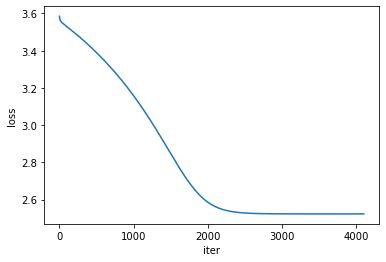

In [35]:
## Plot loss as function of iteration history
df = pd.DataFrame({'iter':jnp.arange(len(l)), 'loss':jnp.array(l)})
sns.lineplot(data=df, x='iter', y='loss')

In [36]:
## Scipy optimize - autograd through an optimization program?
from scipy.optimize import minimize

## Initial value mu
mu0 = 0.5
sigma0 = 0.5
theta0 = jnp.array([mu0, sigma0])

## Optimize for Poisson mean/rate parameter (using Autograd)
theta_bfgs = minimize(fun=normal_loss,
                                           x0=theta0,
                                           args=x,
                                           method='BFGS',
                                           jac=grad_theta)

## Output

#print("Convergence achieved: ", theta_bfgs.success)
#print("Mean=", theta_bfgs.x)

theta_bfgs

      fun: 2.5225656032562256
 hess_inv: array([[9.54844387, 0.10617023],
       [0.10617023, 0.52211835]])
      jac: array([7.2875991e-07, 3.1156426e-06], dtype=float32)
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 18
     njev: 21
   status: 0
  success: True
        x: array([9.97767221, 1.1036286 ])

In [7]:
from sinfo import sinfo
sinfo()

-----
jax         0.2.9
matplotlib  3.3.4
numpy       1.20.1
pandas      1.2.2
seaborn     0.11.1
sinfo       0.3.1
-----
IPython             7.20.0
jupyter_client      6.1.11
jupyter_core        4.7.1
jupyterlab          3.0.9
notebook            6.2.0
-----
Python 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) [GCC 9.3.0]
Linux-3.10.0-1127.el7.x86_64-x86_64-with-centos-7.8.2003-Core
79 logical CPU cores, x86_64
-----
Session information updated at 2021-03-01 13:51
